In [1]:
# Dependencies 
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

Using TensorFlow backend.


In [2]:
# Get the stock data
df = web.DataReader('AAPL', data_source= 'yahoo', start='2010-01-01', end='2020-01-19')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.601469
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.647457
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.223597
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.175119
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.349140
...,...,...,...,...,...,...
2020-01-13,317.070007,311.149994,311.640015,316.959991,30383000.0,316.959991
2020-01-14,317.570007,312.170013,316.700012,312.679993,40488600.0,312.679993
2020-01-15,315.500000,309.549988,311.850006,311.339996,30480900.0,311.339996


In [3]:
# Dimension of the data
df.shape

(2528, 6)

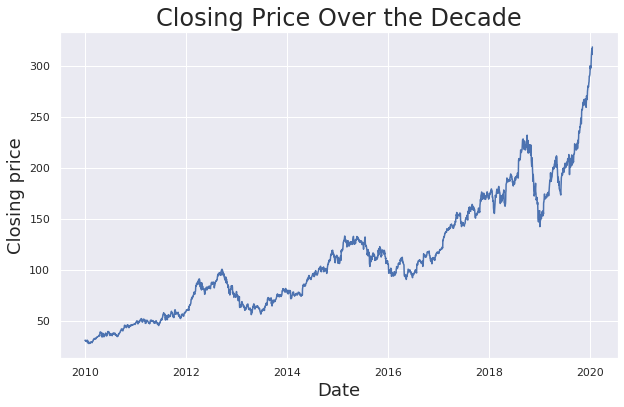

In [23]:
# Plotting the data
plt.figure(figsize=(10,6))
plt.title('Closing Price Over the Decade', fontsize=24)
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing price', fontsize=18 )
plt.show()

In [5]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2023

In [6]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01076967],
       [0.01095112],
       [0.00927878],
       ...,
       [0.97463042],
       [0.98801892],
       [1.        ]])

In [7]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([1.07696657e-02, 1.09511194e-02, 9.27878128e-03, 9.08751886e-03,
       9.77411233e-03, 8.85702177e-03, 7.68491246e-03, 9.12184919e-03,
       8.52353370e-03, 6.80705656e-03, 1.12747988e-02, 9.65150402e-03,
       7.85655756e-03, 2.79540413e-03, 5.40445016e-03, 6.81196089e-03,
       7.76338178e-03, 3.55065171e-03, 4.90433264e-06, 1.31432841e-03,
       1.86850490e-03, 3.52122572e-03, 0.00000000e+00, 1.67233814e-03,
       1.01517067e-03, 2.03034788e-03, 1.50559738e-03, 3.24658964e-03,
       4.08521087e-03, 5.56628659e-03, 5.14943141e-03, 5.33578951e-03,
       4.71785669e-03, 4.10482820e-03, 2.45701172e-03, 4.22253219e-03,
       4.87969967e-03, 6.16460208e-03, 8.30774961e-03, 8.23908895e-03,
       8.47449037e-03, 9.15127518e-03, 1.31923536e-02, 1.32561034e-02,
       1.51883712e-02, 1.60809335e-02, 1.64046195e-02, 1.69440830e-02,
       1.55905133e-02, 1.58896711e-02, 1.57278347e-02, 1.59877577e-02,
       1.48107441e-02, 1.60368011e-02, 1.78072193e-02, 1.83025504e-02,
     

In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1963, 60, 1)

In [10]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1963/1963 [==============================] - 137s 70ms/step - loss: 4.5212e-04


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

8.26225246079601

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


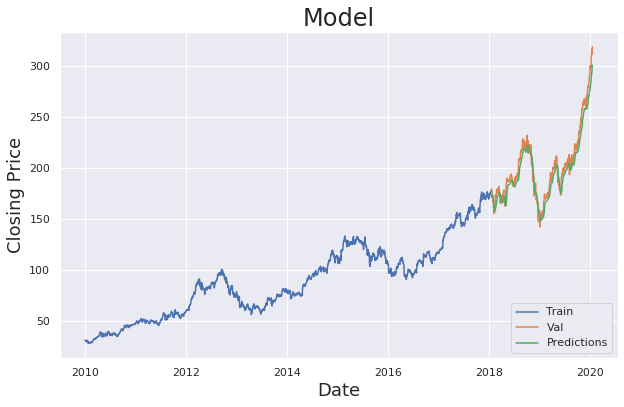

In [24]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(10,6))
plt.title('Model', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [19]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-01-17,179.100006,171.394073
2018-01-18,179.259995,172.078873
2018-01-19,178.460007,172.813431
2018-01-22,177.000000,173.411621
2018-01-23,177.039993,173.726425
...,...,...
2020-01-13,316.959991,292.859467
2020-01-14,312.679993,295.596405
2020-01-15,311.339996,297.795044


In [20]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[266.15826]]


In [21]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
print(apple_quote2['Close'])

Date
2019-12-18    279.73999
Name: Close, dtype: float64
